Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [8]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/spam.csv',encoding_errors= 'replace')

In [9]:
news_dataset.shape

(5572, 5)

In [10]:
# print the first 5 rows of the dataframe
news_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
news_dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
news_dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
news_dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)
news_dataset.sample(15)

,target,text
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
5517,ham,Miles and smiles r made frm same letters but d...
1287,ham,"What do you do, my dog ? Must I always wait ti..."
1314,ham,Got but got 2 colours lor. One colour is quite...
1072,spam,Dear U've been invited to XCHAT. This is our f...
1927,ham,Omg it could snow here tonite!
4821,spam,u r a winner U ave been specially selected 2 r...
3615,ham,Can you please ask macho what his price range ...
3714,ham,"I am late,so call you tomorrow morning.take ca..."
3850,ham,We have all rounder:)so not required:)


In [15]:
print(news_dataset['text'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [16]:
# separating the data & label
X = news_dataset.drop(columns='target', axis=1)
Y = news_dataset['target']

In [17]:
print(X)
print(Y)

                                                   text
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
...                                                 ...
5567  This is the 2nd time we have tried 2 contact u...
5568              Will �_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name

[5572 rows x 1 columns]
0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object


Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [18]:
port_stem = PorterStemmer()

In [19]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [20]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [21]:
print(news_dataset['text'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object


In [22]:
#separating the data and label
X = news_dataset['text'].values


In [23]:
news_dataset['target']=news_dataset['target'].map({'spam':1,'ham':0})

In [24]:
Y = news_dataset['target'].values

In [25]:
print(X)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth els next week gave us free'
 'rofl true name']


In [26]:
print(Y)

[0 0 1 ... 0 0 0]


In [27]:
Y.shape

(5572,)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(min_df = 1, stop_words='english')
X = tfidf.fit_transform(X)

In [29]:
print(X)

  (0, 5770)	0.19655642730117115
  (0, 179)	0.3558222868413158
  (0, 2131)	0.16681084137587843
  (0, 933)	0.3006001057969179
  (0, 710)	0.3396708342818121
  (0, 2837)	0.2879146977859631
  (0, 5934)	0.23853237573588554
  (0, 2168)	0.19655642730117115
  (0, 712)	0.3006001057969179
  (0, 363)	0.2661434662580845
  (0, 1135)	0.2755598674678402
  (0, 3958)	0.24296298032542823
  (0, 2734)	0.3558222868413158
  (1, 3662)	0.5647537939557097
  (1, 5859)	0.4459451111953121
  (1, 2701)	0.47451057922863127
  (1, 2865)	0.4218684931830353
  (1, 3638)	0.2811632882742994
  (2, 247)	0.19034955876282883
  (2, 4224)	0.18389459198973893
  (2, 5518)	0.13934891619268588
  (2, 4974)	0.2239157224418154
  (2, 4179)	0.18777079318453974
  (2, 4260)	0.18389459198973893
  (2, 5259)	0.1340158346859501
  :	:
  (5567, 5469)	0.25140486620897573
  (5567, 3439)	0.3331086652958668
  (5567, 5351)	0.21253091003989893
  (5567, 4003)	0.3194714736947161
  (5567, 941)	0.2527858888624155
  (5567, 4083)	0.264238711998482
  (5567, 4

Splitting the dataset to training & test data

In [30]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
X_sm, y_sm = smote_enn.fit_resample(X, Y)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify=y_sm, random_state=2)

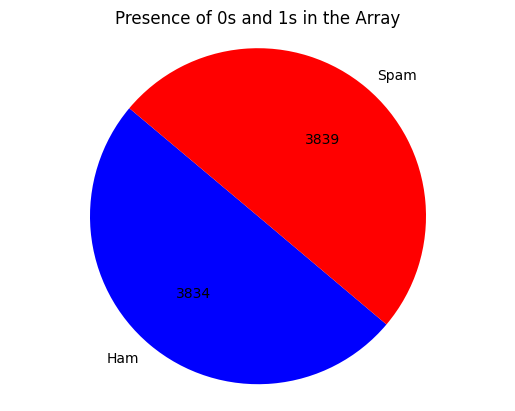

In [32]:
import matplotlib.pyplot as plt
counts = np.bincount(Y_train)
labels = ['Ham', 'Spam']

# Colors for each value
colors = ['blue', 'red']

# Create the pie chart with count labels
plt.pie(counts, labels=labels, colors=colors, autopct=lambda pct: f"{int(np.round(pct * np.sum(counts) / 100))}", startangle=140)

# Add a title
plt.title('Presence of 0s and 1s in the Array')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

Training the Model: Logistic Regression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [35]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9921803727355663


In [37]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9838457529963522


In [39]:
pip install colorama


In [40]:
from sklearn.metrics import classification_report
from colorama import Fore, Style
# Generate the classification report
report = classification_report(Y_test, X_test_prediction)
print(Fore.BLUE + "Classification Report:" + Style.RESET_ALL)
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       959
           1       0.99      0.97      0.98       960

    accuracy                           0.98      1919
   macro avg       0.98      0.98      0.98      1919
weighted avg       0.98      0.98      0.98      1919



Making a Predictive System

In [41]:
input_mail = ["Hey! I am waiting for you outside"]
# convert text to feature vectors
input_data_features = tfidf.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)

prediction = model.predict(input_data_features)


if (prediction[0]==0):
  print('The sms is not spam')
else:
  print('The sms is spam')

The sms is not spam
